<a href="https://colab.research.google.com/github/DanielBrisch/Graficos-FlutuacaoDoOuro/blob/main/Gr%C3%A1ficosFlutua%C3%A7%C3%A3oDoOuro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf


# Gold Aug 23 (GC=F)

# Preço do Ouro a um contrato futuro para Agosto de 2023

# Analisando a partir do ínicio desse século 2000 - 2023

In [ ]:
df = yf.download('GC=F', start='2000-01-01', end='2023-05-31')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...
2023-05-23,1972.400024,1972.400024,1972.400024,1972.400024,1972.400024,1
2023-05-24,1975.400024,1975.400024,1962.800049,1962.800049,1962.800049,189
2023-05-25,1943.099976,1943.099976,1943.099976,1943.099976,1943.099976,1


In [ ]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
# Converta o índice de timestamp para uma coluna 'Date'
df['Date'] = df.index

In [ ]:
# Converta a coluna 'Data' para o tipo de dados de data
df['Date'] = pd.to_datetime(df['Date'])

# Parece que no yahoo finanças não temos no começo de 2000.


<Axes: ylabel='Date'>

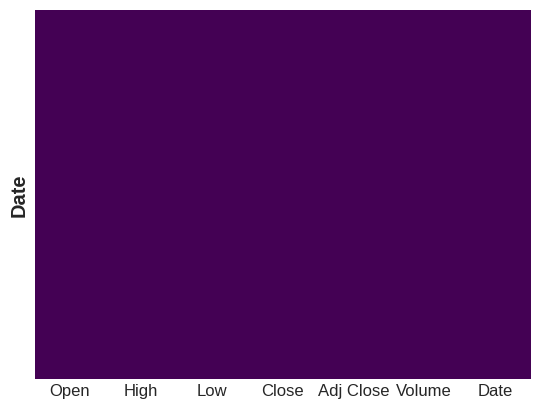

In [ ]:
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

<Axes: xlabel='Date'>

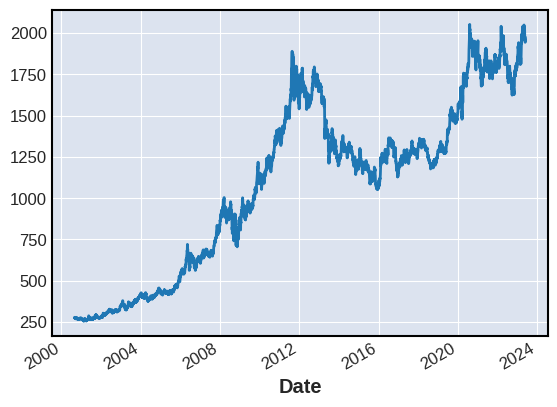

In [ ]:
# Plot a série temporal do preço de fechamento
df['Close'].plot()

In [ ]:
df['Var%'] = df['Close'].pct_change() * 100

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Date,Var%
Date,,,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0,2000-08-30,NaN
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0,2000-08-31,1.606424
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0,2000-09-01,-0.467117
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2,2000-09-05,-0.433217
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0,2000-09-06,-0.580122
...,...,...,...,...,...,...,...,...
2023-05-23,1972.400024,1972.400024,1972.400024,1972.400024,1972.400024,1,2023-05-23,-0.121533
2023-05-24,1975.400024,1975.400024,1962.800049,1962.800049,1962.800049,189,2023-05-24,-0.486715
2023-05-25,1943.099976,1943.099976,1943.099976,1943.099976,1943.099976,1,2023-05-25,-1.003672


In [ ]:
# Substitua os valores NaN na coluna 'Var%' por 0
df['Var%'] = df['Var%'].fillna(0)

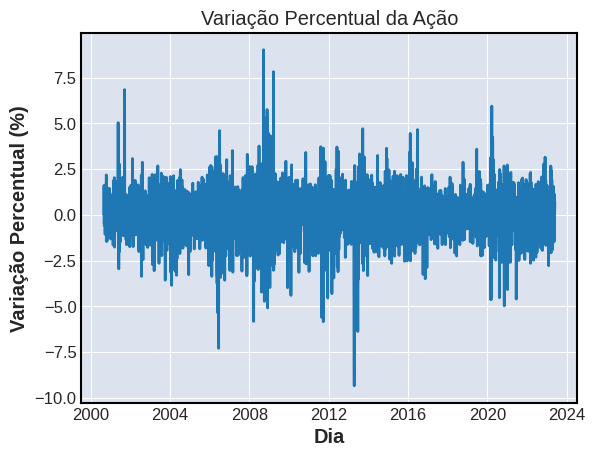

In [ ]:
# Plot o gráfico da variação percentual
plt.plot(df['Var%'])
plt.title('Variação Percentual da Ação')
plt.xlabel('Dia')
plt.ylabel('Variação Percentual (%)')
plt.show()

In [ ]:
df_menor = df[df['Var%'] < 0]
df_valor_menor = df_menor['Var%'].sort_values(ascending=True).iloc[0]
df[df['Var%'] == df_valor_menor]

,Open,High,Low,Close,Adj Close,Volume,Date,Var%
Date,,,,,,,,
2013-04-15,1478.199951,1487.400024,1338.0,1360.599976,1360.599976,1309,2013-04-15,-9.353766


In [ ]:
# Defina o intervalo de datas desejado
data_inicial = pd.to_datetime('2013-04-01')
data_final = pd.to_datetime('2013-04-30')

In [ ]:
# Filtrar o DataFrame para incluir apenas as datas dentro do intervalo
df_filtrado = df[(df['Date'] >= data_inicial) & (df['Date'] <= data_final)]

In [ ]:
df_filtrado

,Open,High,Low,Close,Adj Close,Volume,Date,Var%
Date,,,,,,,,
2013-04-01,1596.800049,1600.500000,1594.800049,1600.000000,1600.000000,688,2013-04-01,0.326057
2013-04-02,1599.199951,1602.599976,1574.099976,1575.099976,1575.099976,2289,2013-04-02,-1.556252
2013-04-03,1575.699951,1576.400024,1549.199951,1552.800049,1552.800049,2171,2013-04-03,-1.415778
2013-04-04,1557.300049,1557.300049,1539.099976,1551.800049,1551.800049,829,2013-04-04,-0.064400
2013-04-05,1553.199951,1580.599976,1550.099976,1575.400024,1575.400024,1184,2013-04-05,1.520813
2013-04-08,1575.800049,1577.800049,1567.800049,1572.000000,1572.000000,101,2013-04-08,-0.215820
2013-04-09,1571.599976,1589.300049,1570.000000,1586.199951,1586.199951,215,2013-04-09,0.903305
2013-04-10,1584.400024,1586.000000,1557.000000,1558.300049,1558.300049,359,2013-04-10,-1.758915
2013-04-11,1557.099976,1566.699951,1554.800049,1564.300049,1564.300049,1070,2013-04-11,0.385035


<Axes: xlabel='Date'>

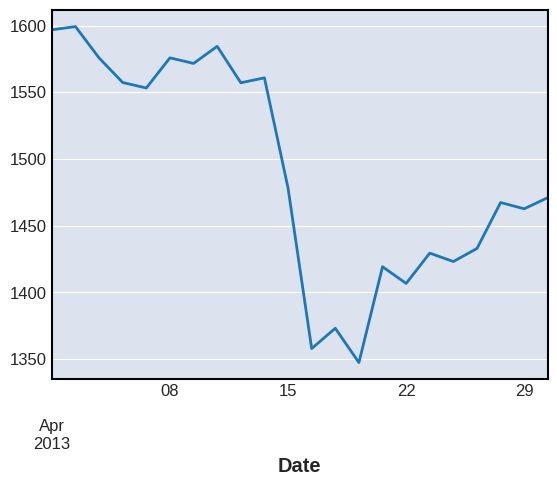

In [ ]:
df_filtrado['Open'].plot()

<Axes: xlabel='Date'>

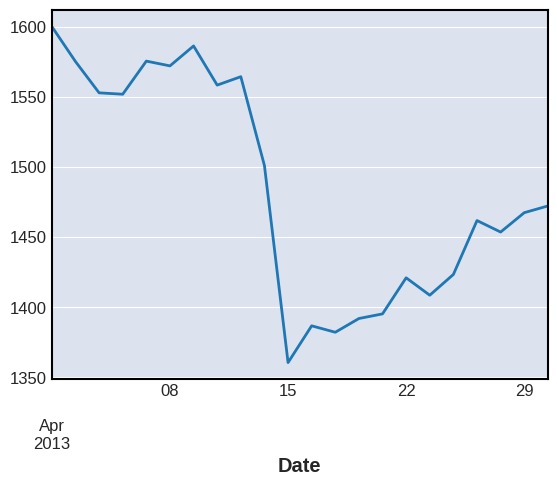

In [ ]:
df_filtrado['Close'].plot()

# Gráfico mais adequado para mostrar variação na taxa é esse de velas abaixo.

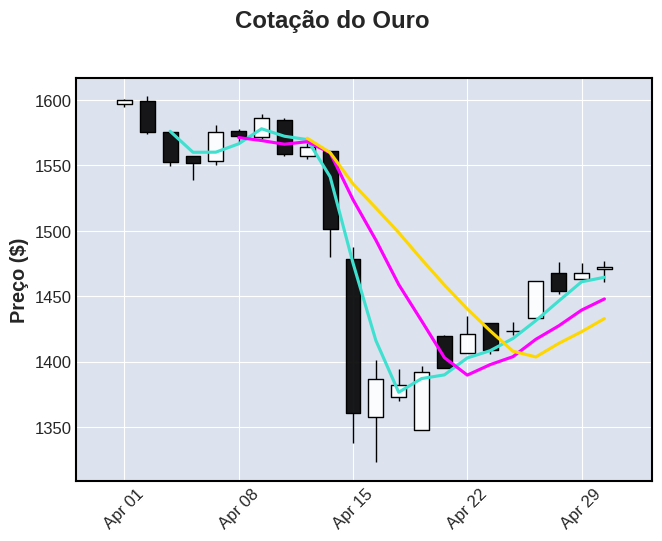

In [ ]:
# Plotando o gráfico de candlestick (vela) - Biblioteca mpf (https://github.com/matplotlib/mplfinance)
mpf.plot(df_filtrado, type='candle',mav=(3,6,9), title='Cotação do Ouro', ylabel='Preço ($)')

# Esses MAVs  representa as Médias Móveis Simples (Moving Averages) que podem ser plotadas junto com o gráfico de candlestick. As médias móveis são utilizadas para suavizar os dados de preço ao longo do tempo e ajudar a identificar tendências.

# O gráfico de candlestick será plotado com três médias móveis: uma média móvel de 3 períodos, uma de 6 períodos e outra de 9 períodos. Essas médias móveis ajudarão a identificar tendências e padrões de preço ao longo do tempo.

# Ou seja, mostra que no dia anterior já existiam movimentos para queda...

# Maior queda, qual a razão?
# https://g1.globo.com/economia/mercados/noticia/2013/04/ouro-fecha-em-forte-queda-em-nova-york.html

# Maior Alta, qual é a razão?

# Fazendo essa análise tentamos compreender fatores para alteração da cotação do valor futuro do Ouro, aí podemos inferir as correlações no nosso modelo..

In [ ]:
data_inicial = pd.to_datetime('2008-01-01')
data_final = pd.to_datetime('2008-12-31')

<Axes: xlabel='Date'>

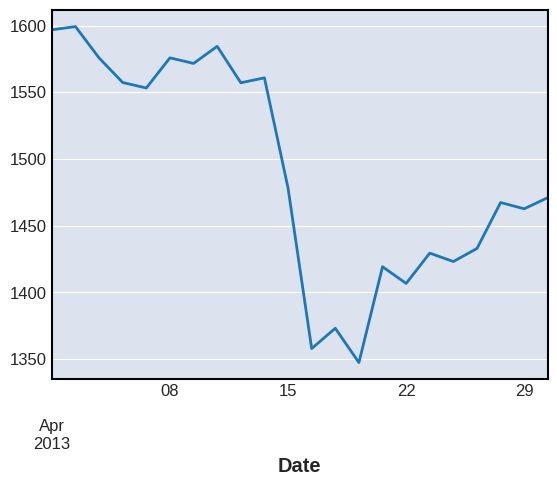

In [ ]:
df_filtrado['Open'].plot()

<Axes: xlabel='Date'>

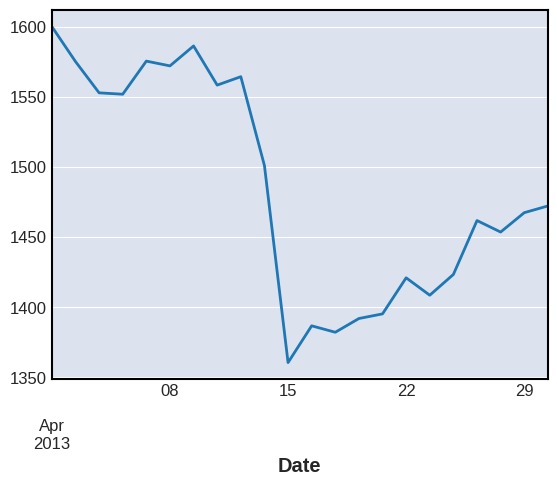

In [ ]:
df_filtrado['Close'].plot()

In [ ]:
df_filtrado = df[(df['Date'] >= data_inicial) & (df['Date'] <= data_final)]

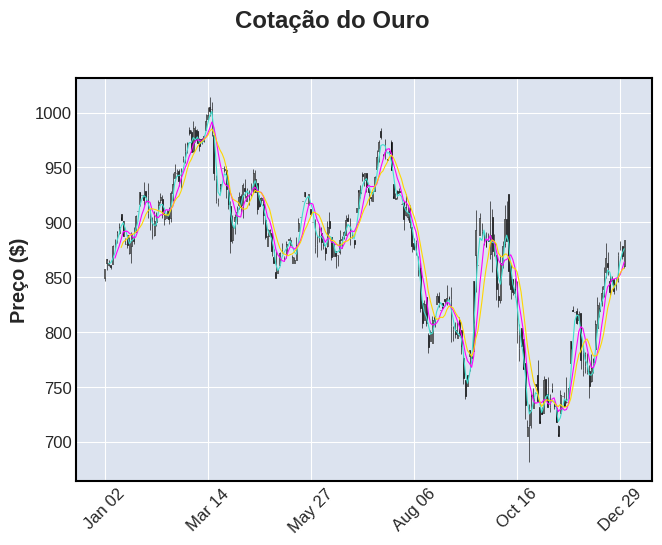

In [ ]:
mpf.plot(df_filtrado, type='candle',mav=(3,6,9), title='Cotação do Ouro', ylabel='Preço ($)')